# Διαμόρφωση Γωνίας - Angle Modulation

Στην διαμόρφωση γωνίας, η πληροφορία αποτυπώνεται στην γωνία του διαμορφωμένου σήματος. Συγκεκριμένα, το διαμορφωμένο σήμα έχει την μορφή:

$ x(t) = A_c cos(\theta(t)) $,

όπου $ \theta(t) = 2 \pi f_c t + \phi(t) $ με $ f_c $ η συχνότητα του φέροντος και $ \phi(t) $ η φάση.

## Διαμόρφωση Φάσης - Phase Modulation (PM) 

Η διαμόρφωση φάσης ορίζεται ως:

$ \phi (t) = K_p \cdot m(t) $, όπου $ K_p = const. $ ευαισθησία φάσης (rad/V)

Δείκτης διαμόρφωσης $ \beta _p  = \Delta \phi _{max} = K_p \cdot max|m(t)| $

## Διαμόρφωση Συχνότητας - Frequency Modulation (FM)

Στην διαμόρφωση συχνότητας ισχύει:

$ \frac{d \phi(t)}{dt} = 2\pi K_f m(t) $

όπου $ K_p = const $ ευαισθησία συχνότητας του διαμορφωτή (Hz/V). Με πράξεις προκύπτει:

$ \phi(t) = 2 \pi K_f \int_{-\infty}^t m(\tau)d\tau $

Η στιγμιαία συχνότητα, η οποία ορίζεται ως: $ f_i(t) = \frac{1}{2\pi}\frac{d\theta(t)}{dt} = f_c + \frac{1}{2\pi}\frac{d\phi(t)}{dt} $, γράφεται ως:

$ f_i(t) = f_c + K_fm(t)$ 

Ως δείκτη διαμόρφωσης τώρα, ορίζουμε:

$ \beta _f = \frac{\Delta f_{max}}{W} = \frac{K_f max|m(t)|}{W} $

Το διαμορφωμένο σήμα γράφεται ως:

$ x(t) = A_c \cdot [cos(2\pi f_c t) cos(\phi(t)) - sin(2\pi f_c t)sin(\phi(t))] $, όπου

$ 
\phi(t) =
\left\{
	\begin{array}{ll}
		K_pm(t)  & \mbox{PM }\\
		2 \pi K_f \int_{-\infty}^t m(\tau)d\tau & \mbox{FM}
	\end{array}
\right.
$

## Εφαρμογή σε παράδειγμα

Έστω τα σήματα πληροφορίας m(t) και n(t):

$ m(t) = sin(\frac{\pi t}{4}) + cos(\frac{\pi t}{2}) $

$ n(t) = m'(t) = \frac{\pi}{4}cos(\frac{\pi t}{4}) - \frac{\pi}{2}sin(\frac{\pi t}{2}) $

Παρακάτω εμφανίζονται οι διαμορφώσεις των σημάτων σε PM και FM. 

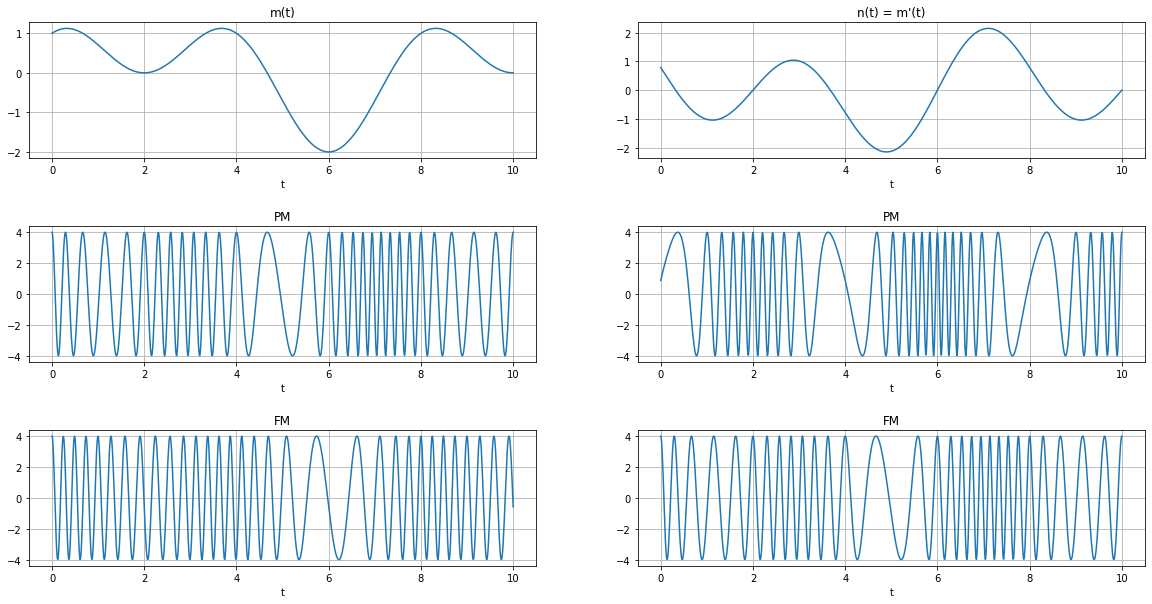

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams["text.usetex"]
matplotlib.rcParams['mathtext.fontset'] = 'cm'
legend_properties = {'weight':'bold'}

t = np.linspace(0,10, 1000)
m = lambda t: np.sin(np.pi*t/4) + np.cos(np.pi*t/2)
n = lambda t: np.pi/4 * np.cos(np.pi*t/4) - np.pi/2 * np.sin(np.pi*t/2)

plt.subplot(321)
plt.plot(t, m(t))
plt.grid()
plt.title('m(t)')
plt.xlabel('t')

plt.subplot(322)
plt.plot(t, n(t))
plt.title("n(t) = m'(t)")
plt.xlabel('t')
plt.grid()

Kp = 2*np.pi
Kf = 1
Ac = 4
fc = 3

x = lambda t:Ac * np.cos(2*np.pi*fc*t)*np.cos(Kp*m(t)) - Ac * np.sin(2*np.pi*fc*t)*np.sin(Kp*m(t))
plt.subplot(323)
plt.plot(t, x(t))
plt.title("PM")
plt.xlabel('t')
plt.grid()

x = lambda t:Ac * np.cos(2*np.pi*fc*t)*np.cos(Kp*n(t)) - Ac * np.sin(2*np.pi*fc*t)*np.sin(Kp*n(t))
plt.subplot(324)
plt.plot(t, x(t))
plt.title("PM")
plt.xlabel('t')
plt.grid()

# integral -inf till t
integM = lambda t: - np.cos(np.pi*t/4)*(4/np.pi) + np.sin(np.pi*t/2)*(2/np.pi) + 4/np.pi
integN = lambda t: m(t) - m(0)

x = lambda t:Ac * np.cos(2*np.pi*fc*t)*np.cos(2*np.pi*Kf*integM(t)) - Ac * np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*Kf*integM(t))
plt.subplot(325)
plt.plot(t, x(t))
plt.title("FM")
plt.xlabel('t')
plt.grid()

x = lambda t:Ac * np.cos(2*np.pi*fc*t)*np.cos(2*np.pi*Kf*integN(t)) - Ac * np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*Kf*integN(t))
plt.subplot(326)
plt.plot(t, x(t))
plt.title("FM")
plt.xlabel('t')
plt.grid()

plt.subplots_adjust(hspace=0.5)

plt.show()

### Ερμηνεία γραφημάτων
* Στην διαμόρφωση γωνίας το πλάτος του σήματος παραμένει σταθερό και μεταβάλλεται μόνο η συχνότητα.
* Στην διαμόρφωση FM: Για μέγιστη τιμή του σήματος πληροφορίας εμφανίζεται η μέγιστη συχνότητα (μέγιστη πύκνωση της γραφικής παράστασης FM), ενώ στην ελάχιστη τιμή του σήματος πληροφορίας έχουμε την ελάχιστη συχνότητα (μέγιστη αραίωση της γραφικής παράστασης FM).
* Στην διαμόρφωση PM: Όταν η συνάρτηση του σήματος πληροφορίας είναι αύξουσα, έχουμε πύκνωση της γραφικής παράστασης του διαμορφωένου σήματος, ενώ όταν το σήμα πληροφορίας είναι φθίνον, το διαμορφωμένο σήμα 'αραιώνει'.

### Δυϊκότητα
Όταν $ K_p = 2 \pi K_f $ (1), τότε για τις διαμορφώσεις PM και FM ισχύει η δυϊκότητα. Δηλαδή, η διαμόρφωση PM του σήματος m(t) είναι ίδια με την διαμόρφωση FM της παραγώγου m'(t). Αυτό είναι εμφανές και στα παραπάνω γραφήματα, στα οποία η σχέση (1) επαληθεύεται.